In [264]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.decomposition import LatentDirichletAllocation

import os 

In [391]:
url = 'data/wikispeedia_paths-and-graph/paths_finished.tsv'
name = ['hashedIpAddress','timestamp','durationInSec','path','rating']
raw_data = pd.read_csv(url,skiprows=15,sep='\t',header=None,names=name)
raw_data.drop(['hashedIpAddress','timestamp'], axis=1, inplace=True)
#drop 

In [392]:
raw_data.head()

,durationInSec,path,rating
0,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [396]:
raw_data['path'][0].rsplit(';')
# paths = raw_data['path'].str.split(';', expand=True)
# paths.head()

['14th_century',
 '15th_century',
 '16th_century',
 'Pacific_Ocean',
 'Atlantic_Ocean',
 'Accra',
 'Africa',
 'Atlantic_slave_trade',
 'African_slave_trade']

In [379]:
data['path'][0]

'14th_century;15th_century;16th_century;Pacific_Ocean;Atlantic_Ocean;Accra;Africa;Atlantic_slave_trade;African_slave_trade'

In [278]:
url_complete = []

#creates list of all the urls for each txt file
for file in os.listdir('./data/plaintext_articles/'):
    if 'txt' in file:
        url_complete.append(os.path.join('./data/plaintext_articles/',file))

text_complete = []

#creates a list where each value is a string of the text file of each url (format needed for count vectorizer)
for url in url_complete:
    file = open(url,"r")
    read_file = file.read()
    read_file = read_file.replace("\n"," ")
    read_file = read_file.replace("wikipedia"," ")
    text_complete.append(read_file)
    


## Latent Dirchilet Allocation model
### clustering and topic modeling







In [279]:
#create a bag of word representation

#To-DO
#clean up so there are no numbers or wikipedia

vect = CountVectorizer(stop_words='english', min_df = 5)

#creates an array
X_vec = vect.fit_transform(text_complete)

#creates vocabulary
#print(vect.get_feature_names())


In [ ]:
vect_tf = TfidfVectorizer(stop_words='english', min_df = 2)
X_vec_tf = vect_tf.fit_transform(text_complete)
feature_names_tf = np.array(vect_tf.get_feature_names())


In [228]:
#plotting functions
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")
    
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [280]:
#create LDA model
lda = LatentDirichletAllocation(n_topics=15, learning_method="batch",
                                random_state=0)
X_lda = lda.fit_transform(X_vec)

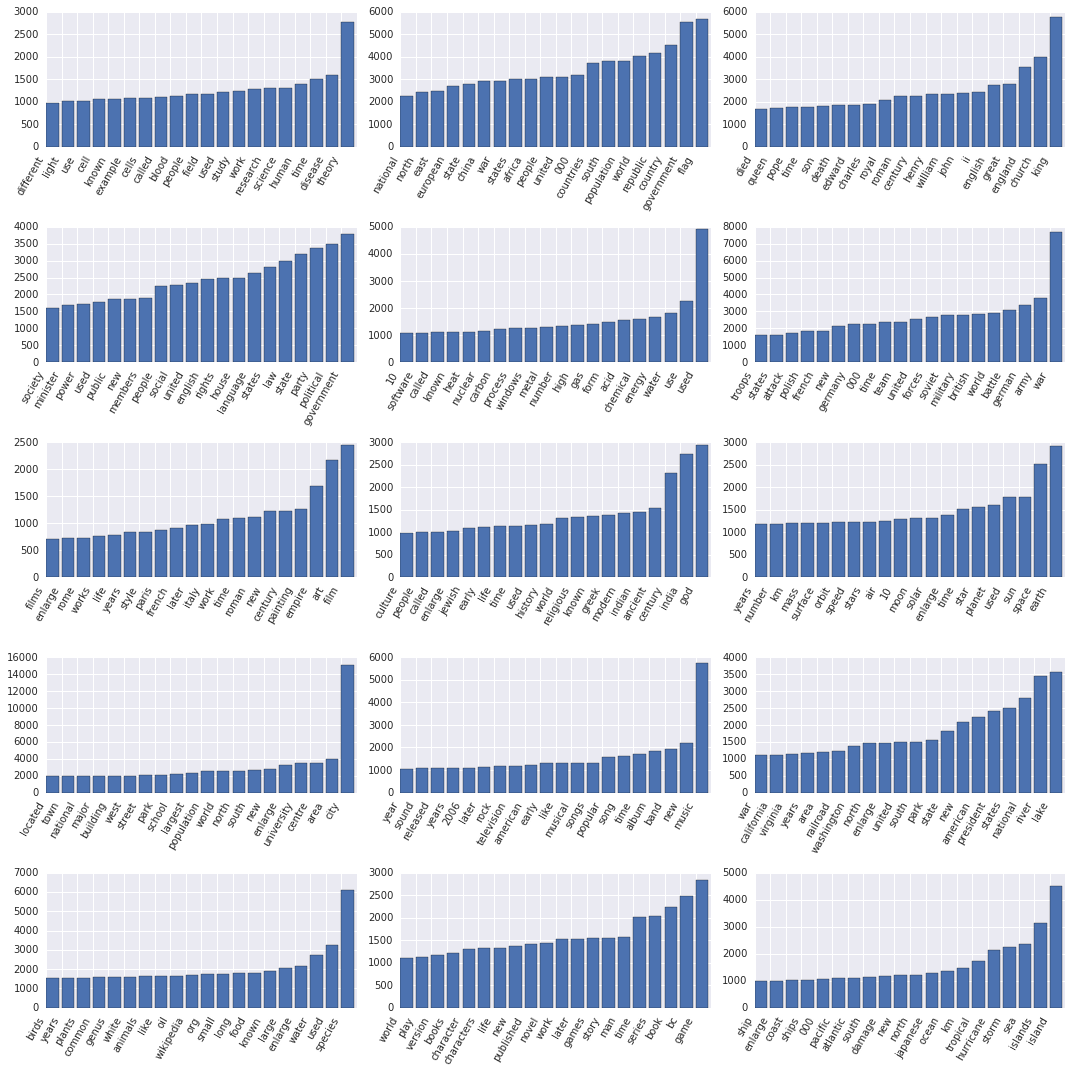

In [281]:
#graph out most important words for each topic
n_components = 15
feature_names = np.array(vect.get_feature_names())
fig, axes = plt.subplots(n_components // 3, 3, figsize=(15, 15))


for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()



In [369]:
#for tfidf vectorizer

# fig, axes = plt.subplots(n_components // 3, 3, figsize=(15, 15))


# for ax, coef in zip(axes.ravel(), lda.components_):
#     plot_important_features(coef, feature_names_tf, top_n=20, ax=ax)
    
# plt.tight_layout()




In [257]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
n_top_words = 20
feature_names = vect.get_feature_names()

print_top_words(lda, feature_names, n_top_words)


Topic #0:
film series time new team united 2006 world year years won later played game 2005 television best season final said
Topic #1:
species wikipedia years north enlarge south known large africa area 000 northern river water org region sea southern long period
Topic #2:
island lake sea islands river water south enlarge ships wikipedia area north ship bridge new great canal time ocean japanese
Topic #3:
disease blood people jewish dna cell brain cells human open treatment research game symptoms jews genetic patients known common children
Topic #4:
used use number time example called using set systems different numbers computer century modern known right form chinese usually theory
Topic #5:
language english new used album wikipedia band time version use languages music released art windows work like words song number
Topic #6:
music century social political human law state rights world people society states work modern theory philosophy new culture popular example
Topic #7:
god life

In [269]:
feature_names_tf = np.array(vect_tf.get_feature_names())
print_top_words(lda, feature_names, n_top_words)


Topic #0:
kidder endosymbionts galilee helots chrononauts involvements ssn horseless pirotechnia glyderau tarlton sudamericana edification unwieldy bazaar gallantry qft countersigned fiscally sodomized
Topic #1:
coral paraphrase oppress feinberg animistic digestion marchal peloponessus rollback boost melody triceratops asks banged minefields arkansas solid coated albiceps entrepreneurship
Topic #2:
fisherwoman crash lemesos acess wombles wyatville kompa ranson katya kell functionally hotter sentimentality levu peppery puny panamanians tajik cognitively ghouls
Topic #3:
southerly generating bipedal edwy shaab biotic philosophical ani chokepoint binap styrian negrete shaak lillehammer avenir claremont inkers breasts grebe connubii
Topic #4:
mocks ishak electoral atlanticus kingsway chiquita pentaquarks completed swe isha cheddi spreadsheets overlooking neretva snare goslings mla synagogue allotting sidewinder
Topic #5:
guerreiro lane recovered peculiar carcharodon palatalized cimarosa an

In [387]:
##see actual top level categories 

url_cat = 'data/wikispeedia_paths-and-graph/categories.tsv'
data_cat = pd.read_csv(url_cat,skiprows=12,sep='\t',header=None,names=['text','subject'])

data_subject = data_cat['subject'].str.split('.', expand=True)

full_data = pd.concat([data_cat,data_subject], axis=1)

full_data.head()

,text,subject,0,1,2,3
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,subject,History,British_History,British_History_1500_and_before_including_Roma...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,subject,People,Historical_figures,None
2,%C3%85land,subject.Countries,subject,Countries,None,None
3,%C3%85land,subject.Geography.European_Geography.European_...,subject,Geography,European_Geography,European_Countries
4,%C3%89douard_Manet,subject.People.Artists,subject,People,Artists,None


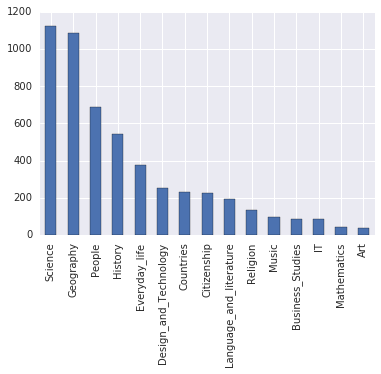

In [389]:
#histogram of categories
full_data[1].value_counts().plot('bar')
